In [1]:
import pandas as pd
import numpy as np
from mqt.predictor import rl
df = pd.read_csv(rl.helper.get_path_trained_model() / 'res.csv', sep=',')

In [2]:
df.columns

Index(['benchmark', 'num_qubits', 'RL_fidelity_time', 'RL_fidelity_fidelity',
       'RL_fidelity_critical_depth', 'RL_fidelity_gate_ratio',
       'RL_fidelity_mix', 'RL_critical_depth_time',
       'RL_critical_depth_fidelity', 'RL_critical_depth_critical_depth',
       'RL_critical_depth_gate_ratio', 'RL_critical_depth_mix', 'RL_mix_time',
       'RL_mix_fidelity', 'RL_mix_critical_depth', 'RL_mix_gate_ratio',
       'RL_mix_mix', 'RL_gate_ratio_time', 'RL_gate_ratio_fidelity',
       'RL_gate_ratio_critical_depth', 'RL_gate_ratio_gate_ratio',
       'RL_gate_ratio_mix', 'qiskit_o3_time', 'qiskit_o3_fidelity',
       'qiskit_o3_critical_depth', 'qiskit_o3_gate_ratio', 'qiskit_o3_mix',
       'tket_time', 'tket_fidelity', 'tket_critical_depth', 'tket_gate_ratio',
       'tket_mix'],
      dtype='object')

In [3]:
df.sort_values(by=["benchmark", "num_qubits"], inplace=True)

In [4]:
df["RL-Qiskit Fid"]=df["RL_fidelity_fidelity"]-df["qiskit_o3_fidelity"]
df["RL-TKET Fid"]=df["RL_fidelity_fidelity"]-df["tket_fidelity"]
df["RL-Qiskit Crit Depth"]=df["RL_critical_depth_critical_depth"]-df["qiskit_o3_critical_depth"]
df["RL-TKET Crit Depth"]=df["RL_critical_depth_critical_depth"]-df["tket_critical_depth"]
df["RL-Qiskit gate_ratio"]=df["RL_gate_ratio_gate_ratio"]-df["qiskit_o3_gate_ratio"]
df["RL-TKET gate_ratio"]=df["RL_gate_ratio_gate_ratio"]-df["tket_gate_ratio"]
df["RL-Qiskit mix"]=df["RL_mix_mix"]-df["qiskit_o3_mix"]
df["RL-TKET mix"]=df["RL_mix_mix"]-df["tket_mix"]

In [5]:
color_qiskit = "#994F00"
color_TKET = "#006CD1"
size = 14
legendsize = 12
max_val_bench = max([df.groupby(["benchmark"])["RL-Qiskit Fid"].mean().max(), 
                     df.groupby(["benchmark"])["RL-TKET Fid"].mean().max(), 
                     df.groupby(["benchmark"])["RL-Qiskit Crit Depth"].mean().max(), 
                     df.groupby(["benchmark"])["RL-TKET Crit Depth"].mean().max(),
                     df.groupby(["benchmark"])["RL-Qiskit gate_ratio"].mean().max(), 
                     df.groupby(["benchmark"])["RL-TKET gate_ratio"].mean().max(),
                     df.groupby(["benchmark"])["RL-Qiskit mix"].mean().max(), 
                     df.groupby(["benchmark"])["RL-TKET mix"].mean().max()])
min_value_bench = min([df.groupby(["benchmark"])["RL-Qiskit Fid"].mean().min(),
                      df.groupby(["benchmark"])["RL-TKET Fid"].mean().min(), 
                      df.groupby(["benchmark"])["RL-Qiskit Crit Depth"].mean().min(), 
                      df.groupby(["benchmark"])["RL-TKET Crit Depth"].mean().min(), 
                      df.groupby(["benchmark"])["RL-Qiskit gate_ratio"].mean().min(), 
                      df.groupby(["benchmark"])["RL-TKET gate_ratio"].mean().min(),
                    df.groupby(["benchmark"])["RL-Qiskit mix"].mean().min(), 
                     df.groupby(["benchmark"])["RL-TKET mix"].mean().min()])

In [6]:
df.columns

Index(['benchmark', 'num_qubits', 'RL_fidelity_time', 'RL_fidelity_fidelity',
       'RL_fidelity_critical_depth', 'RL_fidelity_gate_ratio',
       'RL_fidelity_mix', 'RL_critical_depth_time',
       'RL_critical_depth_fidelity', 'RL_critical_depth_critical_depth',
       'RL_critical_depth_gate_ratio', 'RL_critical_depth_mix', 'RL_mix_time',
       'RL_mix_fidelity', 'RL_mix_critical_depth', 'RL_mix_gate_ratio',
       'RL_mix_mix', 'RL_gate_ratio_time', 'RL_gate_ratio_fidelity',
       'RL_gate_ratio_critical_depth', 'RL_gate_ratio_gate_ratio',
       'RL_gate_ratio_mix', 'qiskit_o3_time', 'qiskit_o3_fidelity',
       'qiskit_o3_critical_depth', 'qiskit_o3_gate_ratio', 'qiskit_o3_mix',
       'tket_time', 'tket_fidelity', 'tket_critical_depth', 'tket_gate_ratio',
       'tket_mix', 'RL-Qiskit Fid', 'RL-TKET Fid', 'RL-Qiskit Crit Depth',
       'RL-TKET Crit Depth', 'RL-Qiskit gate_ratio', 'RL-TKET gate_ratio',
       'RL-Qiskit mix', 'RL-TKET mix'],
      dtype='object')

In [7]:
df["RL-Qiskit Fid"][df["RL-Qiskit Fid"] > 0.0 ].count()/len(df)

0.58

In [8]:
df["RL-TKET Fid"][df["RL-TKET Fid"] > 0.0 ].count()/len(df)

0.715

In [9]:
df["RL-Qiskit gate_ratio"][df["RL-Qiskit gate_ratio"] > 0.0 ].count()/len(df)

1.0

In [10]:
df["RL-TKET gate_ratio"][df["RL-TKET gate_ratio"] > 0.0 ].count()/len(df)

0.795

In [11]:
df["RL-Qiskit Crit Depth"][df["RL-Qiskit Crit Depth"] > 0.0 ].count()/len(df)

0.725

In [12]:
df["RL-TKET Crit Depth"][df["RL-TKET Crit Depth"] > 0.0 ].count()/len(df)

0.745

In [13]:
df["RL-Qiskit mix"][df["RL-Qiskit mix"] > 0.0 ].count()/len(df)

0.725

In [14]:
df["RL-TKET mix"][df["RL-TKET mix"] > 0.0 ].count()/len(df)

0.76

# Expected Fidelity

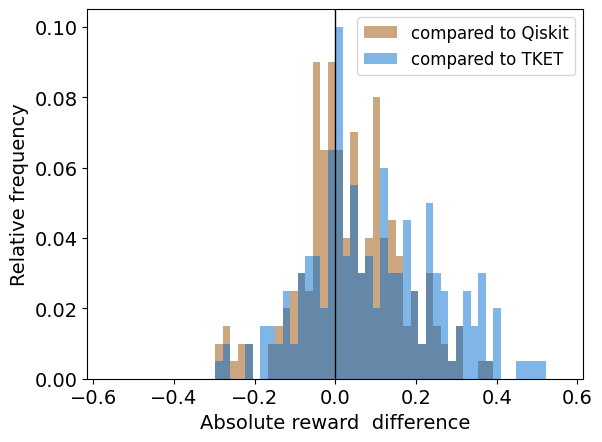

In [15]:
max_val = max([df["RL-Qiskit Fid"].max(), df["RL-TKET Fid"].max(), -df["RL-Qiskit Fid"].min(), -df["RL-TKET Fid"].min()])
xrange = (-max_val-(max_val)/10, max_val+(max_val)/10)
ax = df["RL-Qiskit Fid"].hist(bins=60, alpha=0.5, range=xrange, color=color_qiskit, weights=np.ones(len(df["RL-Qiskit Fid"])) / len(df["RL-Qiskit Fid"]), xlabelsize=size, ylabelsize=size)
df["RL-TKET Fid"].hist(bins=60, ax=ax, alpha=0.5, range=xrange, color=color_TKET, grid=False, weights=np.ones(len(df["RL-TKET Fid"])) / len(df["RL-TKET Fid"]))
ax.set_ylabel("Relative frequency", size=size)
ax.set_xlabel("Absolute reward  difference", size=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axvline(x=0, color= 'black', linewidth=1).get_figure().savefig('results/fidelity_hist.pdf', bbox_inches='tight')

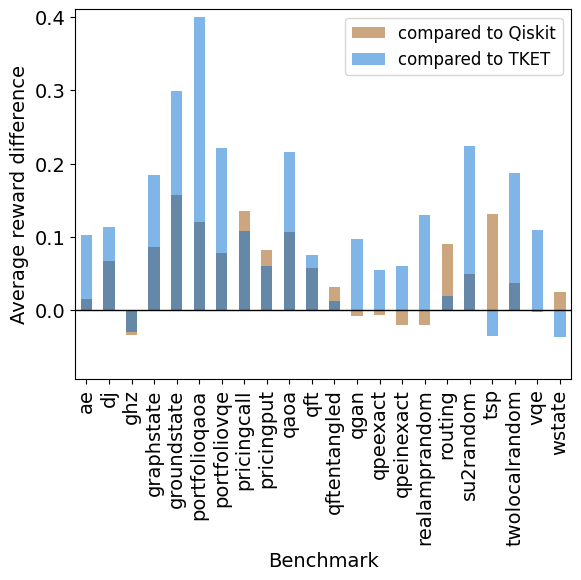

In [16]:
ax = df.groupby(["benchmark"])["RL-Qiskit Fid"].mean().plot(kind="bar", color=color_qiskit, alpha=0.5)
df.groupby(["benchmark"])["RL-TKET Fid"].mean().plot(kind="bar", ax=ax, color=color_TKET, alpha=0.5)
ax.set_ylabel("Average reward difference", size=size)
ax.set_xlabel("Benchmark", size=size)
ax.tick_params(axis='x', which='both', labelsize=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.set_ylim(min_value_bench-0.01, max_val_bench+0.01)
ax.tick_params(axis='both', labelsize=size)
ax.axhline(y=0, color= 'black', linewidth=1).get_figure().savefig('results/fidelity_bench.pdf', bbox_inches='tight')

In [17]:
print(df["RL-Qiskit Fid"].mean(), df["RL-TKET Fid"].mean())

0.0356906225915 0.093943738355


# Gate Ratio

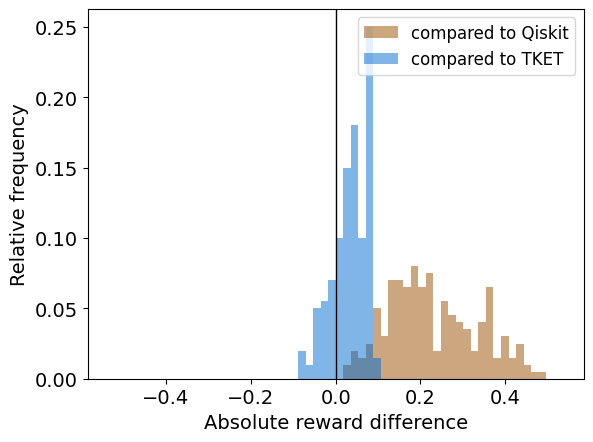

In [18]:
max_val = max([df["RL-Qiskit gate_ratio"].max(), df["RL-TKET gate_ratio"].max(), -df["RL-Qiskit gate_ratio"].min(), -df["RL-TKET gate_ratio"].min()])
xrange = (-max_val-(max_val)/10, max_val+(max_val)/10)
ax = df["RL-Qiskit gate_ratio"].hist(bins=60, alpha=0.5, range=xrange, color=color_qiskit, weights=np.ones(len(df["RL-Qiskit gate_ratio"])) / len(df["RL-Qiskit gate_ratio"]), xlabelsize=size, ylabelsize=size)
df["RL-TKET gate_ratio"].hist(bins=60, ax=ax,alpha=0.5, range=xrange, color=color_TKET, grid=False, weights=np.ones(len(df["RL-TKET gate_ratio"])) / len(df["RL-TKET gate_ratio"]))
ax.set_ylabel("Relative frequency", size=size)
ax.set_xlabel("Absolute reward difference", size=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axvline(x=0, color= 'black', linewidth=1).get_figure().savefig('results/gate_ratio_hist.pdf', bbox_inches='tight')

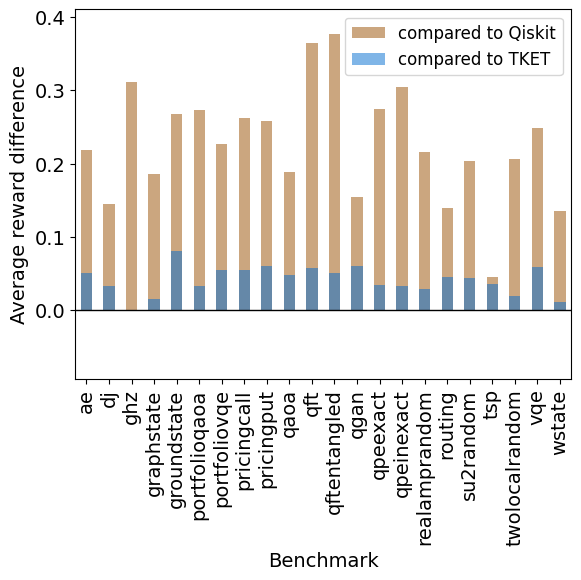

In [19]:
ax = df.groupby(["benchmark"])["RL-Qiskit gate_ratio"].mean().plot(kind="bar", color=color_qiskit, alpha=0.5)
df.groupby(["benchmark"])["RL-TKET gate_ratio"].mean().plot(kind="bar", ax=ax, color=color_TKET, alpha=0.5)
ax.set_ylabel("Average reward difference", size=size)
ax.set_xlabel("Benchmark", size=size)
ax.tick_params(axis='x', which='both', labelsize=size)
ax.set_ylim(min_value_bench-0.01, max_val_bench+0.01)
ax.tick_params(axis='both', labelsize=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axhline(y=0, color= 'black', linewidth=1).get_figure().savefig('results/gate_ratio_bench.pdf', bbox_inches='tight')

In [20]:
print(df["RL-Qiskit gate_ratio"].mean(), df["RL-TKET gate_ratio"].mean())

0.23017971798399997 0.03407119495150001


# Critical Depth

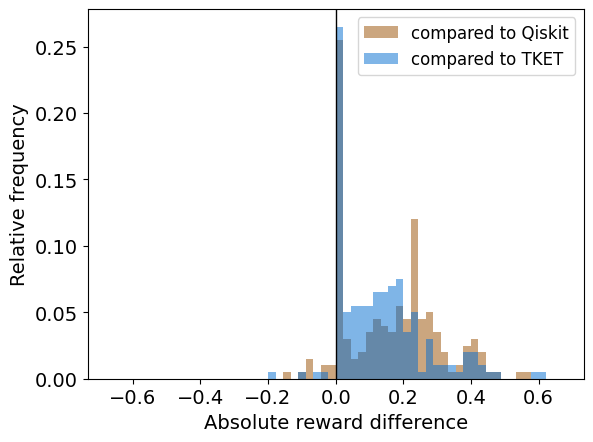

In [21]:
max_val = max([df["RL-Qiskit Crit Depth"].max(), df["RL-TKET Crit Depth"].max(), -df["RL-Qiskit Crit Depth"].min(), -df["RL-TKET Crit Depth"].min()])
xrange = (-max_val-(max_val)/10, max_val+(max_val)/10)
ax = df["RL-Qiskit Crit Depth"].hist(bins=60, alpha=0.5, range=xrange, color=color_qiskit, weights=np.ones(len(df["RL-Qiskit Crit Depth"])) / len(df["RL-Qiskit Crit Depth"]), xlabelsize=size, ylabelsize=size)
df["RL-TKET Crit Depth"].hist(bins=60, ax=ax, alpha=0.5, range=xrange, grid=False, color=color_TKET, weights=np.ones(len(df["RL-TKET Crit Depth"])) / len(df["RL-TKET Crit Depth"]))
ax.set_ylabel("Relative frequency", size=size)
ax.set_xlabel("Absolute reward difference", size=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axvline(x=0, color= 'black', linewidth=1).get_figure().savefig('results/critical_depth_hist.pdf', bbox_inches='tight')

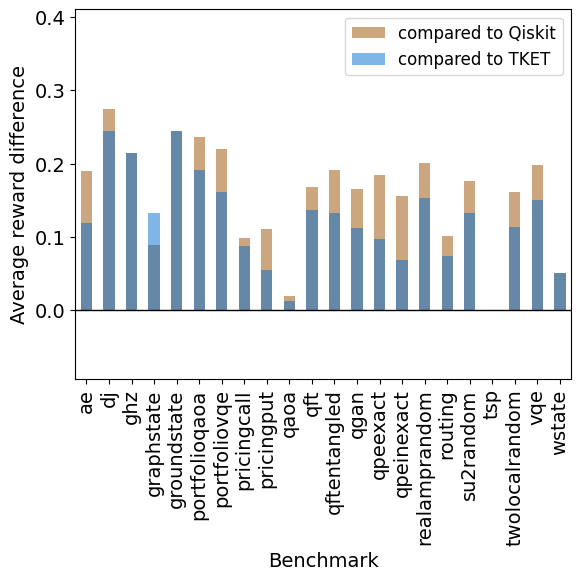

In [22]:
ax = df.groupby(["benchmark"])["RL-Qiskit Crit Depth"].mean().plot(kind="bar", color=color_qiskit, alpha=0.5)
df.groupby(["benchmark"])["RL-TKET Crit Depth"].mean().plot(kind="bar", ax=ax, color=color_TKET, alpha=0.5)
ax.set_ylabel("Average reward difference", size=size)
ax.set_xlabel("Benchmark", size=size)
ax.tick_params(axis='x', which='both', labelsize=size)
ax.set_ylim(min_value_bench-0.01, max_val_bench+0.01)
ax.tick_params(axis='both', labelsize=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axhline(y=0, color= 'black', linewidth=1).get_figure().savefig('results/critical_depth_bench.pdf', bbox_inches='tight')

In [23]:
print(df["RL-Qiskit Crit Depth"].mean(), df["RL-TKET Crit Depth"].mean())

0.1584883609395 0.1279994980725


# Mix

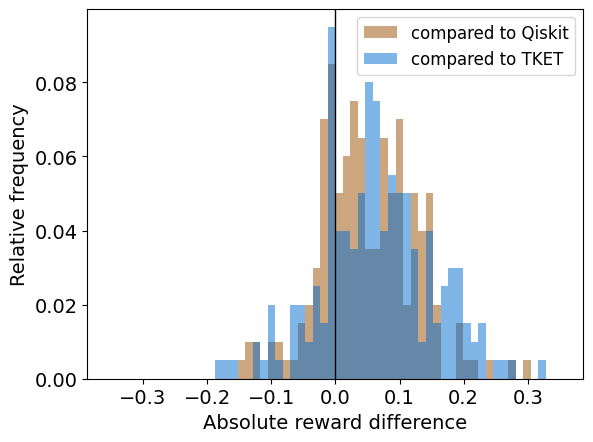

In [24]:
max_val = max([df["RL-Qiskit mix"].max(), df["RL-TKET mix"].max(), -df["RL-Qiskit mix"].min(), -df["RL-TKET mix"].min()])
xrange = (-max_val-(max_val)/10, max_val+(max_val)/10)
ax = df["RL-Qiskit mix"].hist(bins=60, alpha=0.5, range = xrange, color=color_qiskit, weights=np.ones(len(df["RL-Qiskit mix"])) / len(df["RL-Qiskit mix"]), xlabelsize=size, ylabelsize=size)
df["RL-TKET mix"].hist(bins=60, ax=ax, alpha=0.5, range = xrange, grid=False, color=color_TKET, weights=np.ones(len(df["RL-TKET mix"])) / len(df["RL-TKET mix"]))
ax.set_ylabel("Relative frequency", size=size)
ax.set_xlabel("Absolute reward difference", size=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axvline(x=0, color= 'black', linewidth=1).get_figure().savefig('results/mix_hist.pdf', bbox_inches='tight')

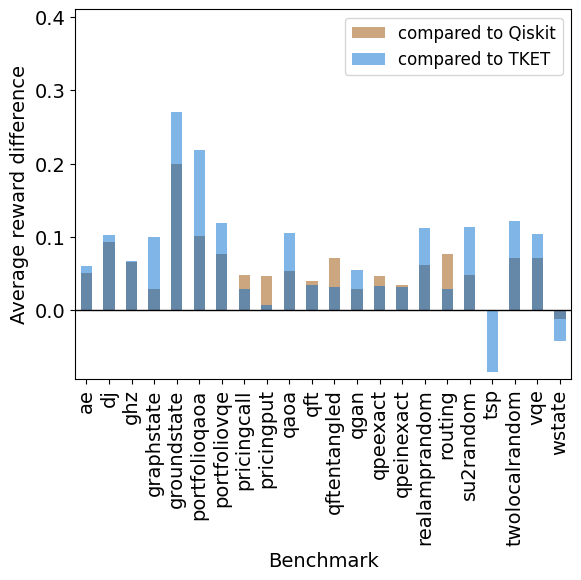

In [25]:
ax = df.groupby(["benchmark"])["RL-Qiskit mix"].mean().plot(kind="bar", color=color_qiskit, alpha=0.5)
df.groupby(["benchmark"])["RL-TKET mix"].mean().plot(kind="bar", ax=ax, color=color_TKET, alpha=0.5)
ax.set_ylabel("Average reward difference", size=size)
ax.set_xlabel("Benchmark", size=size)
ax.tick_params(axis='x', which='both', labelsize=size)
ax.set_ylim(min_value_bench-0.01, max_val_bench+0.01)
ax.tick_params(axis='both', labelsize=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axhline(y=0, color= 'black', linewidth=1).get_figure().savefig('results/mix_bench.pdf', bbox_inches='tight')

In [26]:
print(df["RL-Qiskit mix"].mean(), df["RL-TKET mix"].mean())

0.0501945773225 0.06407670377074999


# 4x4 Matrix With Mean Results and RL Optimization Criterion Comparison

In [27]:
RL_fidelity = [df["RL_fidelity_fidelity"].mean(), df["RL_fidelity_gate_ratio"].mean(), df["RL_fidelity_critical_depth"].mean(), df["RL_fidelity_mix"].mean()]
RL_gate_ratio = [df["RL_gate_ratio_fidelity"].mean(),df["RL_gate_ratio_gate_ratio"].mean(),df["RL_gate_ratio_critical_depth"].mean(), df["RL_gate_ratio_mix"].mean()]
RL_critical_depth = [ df["RL_critical_depth_fidelity"].mean(),df["RL_critical_depth_gate_ratio"].mean(), df["RL_critical_depth_critical_depth"].mean(), df["RL_critical_depth_mix"].mean()]
RL_mix =[ df["RL_mix_fidelity"].mean(),df["RL_mix_gate_ratio"].mean(), df["RL_mix_critical_depth"].mean(), df["RL_mix_mix"].mean()]

In [28]:
print(np.round(RL_fidelity,2))
print(np.round(RL_gate_ratio,2))
print(np.round(RL_critical_depth,2))
print(np.round(RL_mix,2))

[0.47 0.67 0.24 0.36]
[0.21 0.92 0.32 0.27]
[0.27 0.74 0.38 0.32]
[0.42 0.72 0.34 0.38]
